In [1]:
import numpy as np


In [2]:
class K_means():
    def fit(self, X, k, max_iters=100):
        self.x = X
        m, n = X.shape
        self.mu = X[np.random.choice(m, k, replace=False)]
        self.c = np.zeros(m)
        for _ in range(max_iters):
            for i in range(m):
                self.c[i] = np.argmin(np.linalg.norm(X[i]-self.mu, axis=1))
            new_mu = np.zeros_like(self.mu)
            for i in range(k):
                points_in_cluster = X[self.c == i]
                if len(points_in_cluster)>0:
                    new_mu[i] = np.mean(points_in_cluster, axis=0)
            if np.allclose(self.mu, new_mu):
                    break
                
        self.mu = new_mu
        return self.mu, self.c
    
    def predict(self, X):
        m = X.shape[0]
        c = np.zeros(m)
        for i in range(m):
            c[i] = np.argmin(np.linalg.norm(X[i]-self.mu, axis=1))
        return c

In [3]:
if __name__ == "__main__":
    X = np.random.rand(100, 2)  
    kmeans = K_means()
    centroids, assignments = kmeans.fit(X, k=3)
    
    print("Centroids:", centroids)
    print("Cluster assignments:", assignments)
    
    new_data = np.random.rand(5, 2)  
    predictions = kmeans.predict(new_data)
    print("Predictions:", predictions)


Centroids: [[0.87223191 0.5102992 ]
 [0.72036495 0.8548717 ]
 [0.33096224 0.45124053]]
Cluster assignments: [2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2.
 0. 1. 2. 2. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 1. 2. 0. 2. 2. 2. 0. 0.
 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 0. 2. 2. 0. 2. 0. 2. 0.
 2. 2. 0. 2. 2. 2. 2. 1. 0. 2. 2. 2. 2. 2. 2. 1. 0. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]
Predictions: [2. 2. 2. 2. 2.]


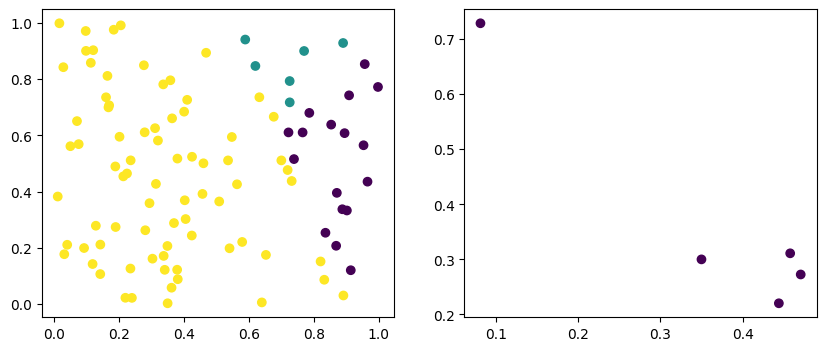

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].scatter(X[:,0], X[:,1], c=assignments, cmap='viridis')

ax[1].scatter(new_data[:,0], new_data[:,1], c=predictions, cmap='viridis')
plt.show()

In [5]:
class KMenas():
    def fit(self, X, K, max_iters=100):
        m, n = X.shape
        self.mu = X[np.random.choice(m, K, replace=False)]
        self.c = np.zeros(m)
        
        for _ in range(max_iters):
            J = 0
            for i in range(m):
                self.c[i] = np.argmin(np.linalg.norm(X[i]-self.mu, axis=1))
                J += np.min(np.linalg.norm(X[i]-self.mu, axis=1))
            for j in range(K):
                dataincluster= X[self.c == j]
                self.mu[j] = np.mean(dataincluster, axis=0)
            
            if J <1e-5:
                break
        return self.mu, self.c
    
    def predict(self, X):
        m = X.shape[0]
        c = np.zeros(m)
        for i in range(m):
            c[i] = np.argmin(np.linalg.norm(X[i]-self.mu, axis=1))
        return c

In [10]:
if __name__ == "__main__":
    X = np.random.rand(1000, 2)  
    kmeans = KMenas()
    centroids, assignments = kmeans.fit(X, K=3)
    
    print("Centroids:", centroids)
    print("Cluster assignments:", assignments)
    
    new_data = np.random.rand(50, 2)  
    predictions = kmeans.predict(new_data)
    print("Predictions:", predictions)

Centroids: [[0.49880784 0.80825102]
 [0.76911344 0.33735619]
 [0.20359854 0.33292811]]
Cluster assignments: [2. 0. 2. 0. 0. 0. 1. 1. 1. 2. 0. 1. 0. 0. 2. 0. 2. 2. 1. 1. 0. 1. 1. 1.
 2. 0. 2. 0. 2. 1. 0. 2. 2. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 2. 1. 2. 2. 1.
 0. 0. 0. 2. 2. 0. 0. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 0. 0. 2. 1. 2. 2. 1.
 1. 1. 2. 0. 0. 0. 1. 0. 0. 1. 0. 0. 2. 2. 0. 2. 0. 2. 1. 1. 0. 2. 0. 0.
 2. 0. 2. 0. 1. 0. 1. 1. 2. 0. 1. 2. 2. 1. 2. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 2. 0. 1. 1. 1. 2. 1. 0. 2. 1. 0. 2. 0. 2. 0. 1. 0. 0. 1.
 2. 0. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 0. 0. 2. 0. 2. 0. 0. 0. 1. 0. 2. 1.
 1. 2. 2. 2. 0. 1. 1. 1. 1. 1. 2. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 2. 0. 1.
 2. 2. 2. 1. 1. 0. 1. 0. 2. 0. 2. 0. 2. 2. 2. 1. 1. 1. 0. 0. 1. 0. 2. 0.
 1. 0. 0. 0. 2. 1. 0. 1. 0. 0. 1. 1. 2. 0. 0. 1. 0. 1. 0. 0. 2. 1. 2. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 2. 2. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 2.
 0. 1. 1. 2. 2. 0. 0. 1. 0. 1. 1. 1. 0. 2. 0. 2. 1. 0. 0. 2. 1. 0. 1. 1.
 0. 2. 1. 1. 1. 

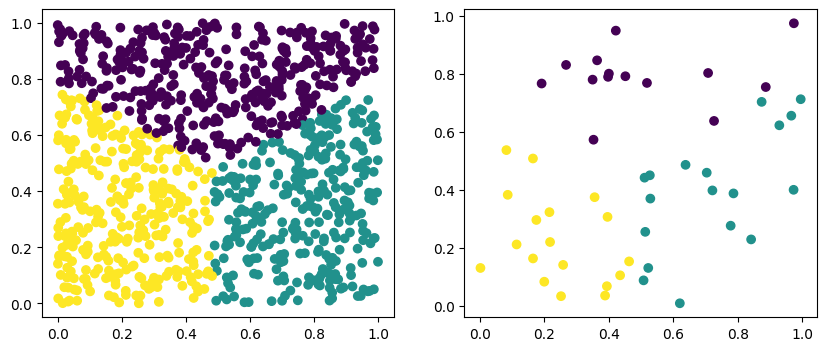

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].scatter(X[:,0], X[:,1], c=assignments, cmap='viridis')

ax[1].scatter(new_data[:,0], new_data[:,1], c=predictions, cmap='viridis')
plt.show()